<a href="https://colab.research.google.com/github/jonathannghj/PyTorch-Deep-Learning/blob/main/02_neural_network_classification_with_pytorch_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network Classification with PyTorch

Classification -> problem of predicting whether something is one thing or another (there can be multiple things as the options).

### Make classification data and get it ready

In [ ]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X: \n {X[:5]}")
print(f"First 5 samples of y: \n {y[:5]}")

First 5 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
 [1 1 1 1 0]


In [ ]:
y
## classification

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
# Make DataFrame of circle data

import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)


,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


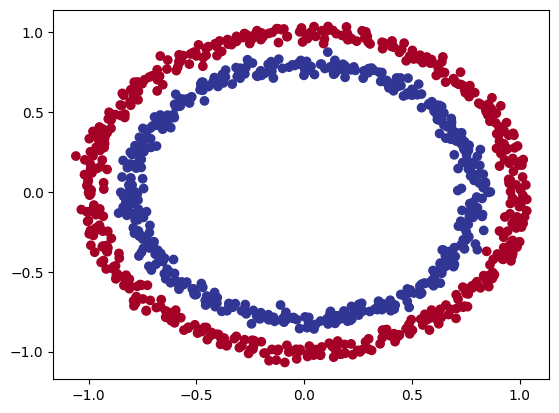

In [ ]:
# Visualise, Visualise

import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

# X gives the (x,y) coordinates of the circle, y gives the color of the datapoint, whether it is red or blue
# Note the data that we are working with is a toy dataset, a dataset small enough to make xperiment

### 1.1 Check input and output shapes



In [ ]:
X.shape, y.shape
# y is a scalar
# x has 2 features. 2 samples of X gives 1 sample of y

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and sample for y {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and sample for y 1
Shapes for one sample of X: (2,) and the same for y: ()


In [ ]:
### 1.2 Turn data into tensors and create train and test split (** IMPT **)

import torch
torch.__version__


'2.0.0+cu118'

In [ ]:
type(X), X.dtype # need to convert from numpy to tensors, and ensure that the type is set to torch.float32 (\or simply torch.float)

(numpy.ndarray, dtype('float64'))

In [ ]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [ ]:
X

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        ...,
        [-0.1369, -0.8100],
        [ 0.6704, -0.7675],
        [ 0.2811,  0.9638]])

In [ ]:
y

tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
        1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
        0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
        1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
        1., 0., 1., 1., 0., 1., 1., 0., 

In [ ]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [ ]:
# Split data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42 # seeded random splits
                                                    )

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify the blue and red dots.

To do so, we want to:
1. Set up device agonistic code so that we will run on an accelerator if there is one
2. Constructing a model (by subclassing nn.Module)
3. Define a loss function and optimizer
4. Create a training and test loop

In [ ]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we've setup device agnostic code, let's create a model that:

1. Subclasses "nn.module" (almost all models in PyTorch subclass 'nn.Module')
2. Create 2 'nn.Linear()' layers that are capable of handling the shapes of our data
3. Define a forward method() that outlines that outlines the forward propagation
4. Instantiate an instance of our model class and send it to our target device

In [ ]:
#. 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linearlayers
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # out_features is generally multiples of 8, but can be any arbitary value. Now upscales the 2 features to 5 features. Rule of thumb is to have more features in the hidden layer in order to perform more learning on it 
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

    self.two_linear_layers = nn.Sequential(
      nn.Linear(in_features=2, out_features=5),
      nn.Linear(in_features=5, out_features=1)
    )
  # 3. Define a method() that
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
  # or return self.two_linear_layers

# 4 Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)


In [ ]:
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [ ]:
device

'cuda'

In [ ]:
# makes the model parameters to be on the device
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# easier, but not good for complex operations
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()
# relevant weights and biases for each layer

OrderedDict([('0.weight',
              tensor([[-0.1783,  0.2673],
                      [-0.3252,  0.3103],
                      [-0.6019,  0.1952],
                      [-0.1251, -0.2267],
                      [ 0.2156,  0.0471]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.5095, -0.0439, -0.5219,  0.5109, -0.2420], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.4420,  0.2744, -0.4123, -0.2692,  0.0230]], device='cuda:0')),
             ('1.bias', tensor([0.2927], device='cuda:0'))])

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[0.6596],
        [0.7573],
        [0.4363],
        [0.7228],
        [0.4882],
        [0.5475],
        [0.7813],
        [0.7323],
        [0.4344],
        [0.7644]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

which loss function or optimizer should you use?

Regression might want MAE or MSE
Classification might want binary cross entropy or categorical cross entropy

In [ ]:
loss_fn = nn.BCELoss() # requires inputes to have gone through the activation function prior to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss() = sigmoid activation function built in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# Calculate accuracy - out of 100 examples, what percentage does our mode get right?

def accuracy(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # .item returns the value of this tensor as a standard Python number. This only works for tensors with one element.
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Train loop

Training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels
Our model outputs are going to be raw logits.

We can convert logits into prediction probabilities by passing them into an activation function. (e.g sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to prediction labels by either rounding them (binary) or taking the argmax.

In [ ]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.6596],
        [0.7573],
        [0.4363],
        [0.7228],
        [0.4882]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them
* y_pred_probs >= 0.5, y=1 (class 1)
* y_pred_probs < 0.5, y=0 (class 0)"

In [ ]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_prob = torch.sigmoid(y_logits)
y_pred_prob

tensor([[0.6592],
        [0.6808],
        [0.6074],
        [0.6732],
        [0.6197]], device='cuda:0')

In [ ]:
 torch.round(y_pred_prob)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

## Train Model

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# An epoch is one loop through the data epoch is a hyperparameter since we set it ourselves
epochs = 200

# Put data to target device 
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Tracking different values of current model vs new model
epoch_count = []
loss_values = []
test_loss_values = []

### Training 
# 0. Loop through the data
for epoch in range (epochs):
  # Set the model to training mode
  model_0.train() # train mode in Pytorch sets all parameters that require 
  model_0.eval() # turns off gradient tracking

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss 
  # for this loss, since our loss function is BCEWithLogitsLoss, the loss_fn takes in logits as the first parameter instead of y_pred
  # if the loss function was .BCELoss() instead of BCEWithLogitsLoss(), the loss calculation would be as follows
  # loss = loss_fn(torch.sigmoid(y_logits), y_train)
  loss = loss_fn(y_logits, y_train)
  acc = accuracy(y_true=y_train,
                 y_pred=y_pred)
  
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumuate through the loop... so we have to zero them in step 3 during the next iteration
 
  ### Testing
  model_0.eval() # turns off gradient tracking & different settings in the model not needed for evaluation
  
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
    # 1. Do forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy(y_true=y_test,
                           y_pred=test_pred)
  # Status Update
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Loss: {loss:.5f} , Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.73484 , Acc: 50.00% | Test Loss: 0.73905, Test acc: 50.00%
Epoch: 10 | Loss: 0.70705 , Acc: 50.00% | Test Loss: 0.71339, Test acc: 50.00%
Epoch: 20 | Loss: 0.69831 , Acc: 58.38% | Test Loss: 0.70495, Test acc: 58.00%
Epoch: 30 | Loss: 0.69546 , Acc: 52.75% | Test Loss: 0.70193, Test acc: 49.50%
Epoch: 40 | Loss: 0.69448 , Acc: 52.12% | Test Loss: 0.70069, Test acc: 47.00%
Epoch: 50 | Loss: 0.69409 , Acc: 51.88% | Test Loss: 0.70004, Test acc: 47.50%
Epoch: 60 | Loss: 0.69391 , Acc: 51.25% | Test Loss: 0.69962, Test acc: 47.00%
Epoch: 70 | Loss: 0.69379 , Acc: 51.50% | Test Loss: 0.69929, Test acc: 46.00%
Epoch: 80 | Loss: 0.69371 , Acc: 51.12% | Test Loss: 0.69901, Test acc: 46.00%
Epoch: 90 | Loss: 0.69363 , Acc: 51.38% | Test Loss: 0.69875, Test acc: 45.50%
Epoch: 100 | Loss: 0.69357 , Acc: 51.38% | Test Loss: 0.69853, Test acc: 45.50%
Epoch: 110 | Loss: 0.69352 , Acc: 51.50% | Test Loss: 0.69831, Test acc: 45.50%
Epoch: 120 | Loss: 0.69347 , Acc: 51.50% | Test Los

## 4. Make predictions and evaluate the model

From the metrics it looks like our model is not learning

So to inspect it let's make some predictions and make them visual!

In other words, "Visualize, Visualize, Visualize!"

To do so, we are going to import a model called 'plot_decision_boundary' 

In [ ]:
import requests
from pathlib import Path

# Download helper functions from the Learn PyTorch 
# if the file exists
if Path("helper_function.py").is_file():
  print("helper_function.py already exists, skipping download")
else:
  print("Download helper_function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py" , "wb") as f: # wb is to grant write permissions
    f.write(request.content)

helper_function.py already exists, skipping download


In [ ]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.
    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

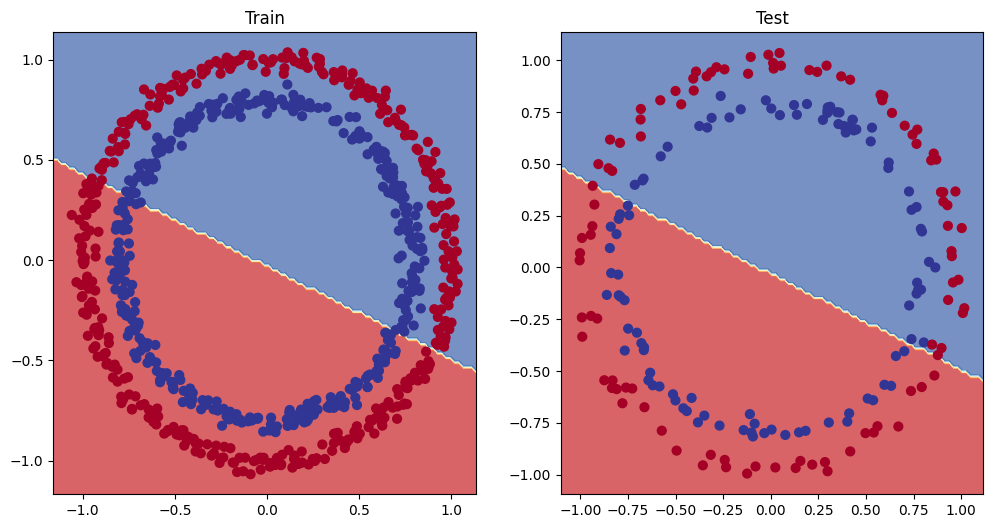

In [ ]:
from helper_function import plot_predictions, plot_decision_boundary

# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

# the line represents the line that the model is trying to fit on the model

## 5. Improving a model (from a model perspective)

* Adding more layers - giving the model more chances to learn about patterns in the data
* Adding more hidden units (more neurons) - go from 5 hidden units to 10 hidden units
* Fit for longer (adjusting the number of epochs)
* Changing the activation functions (can also include it into the model itself)
* Change the learning rate (vanishing gradient problem ( gradient reaches 0 too quickly, nothing to learn))
* Change the loss function (BCELoss())

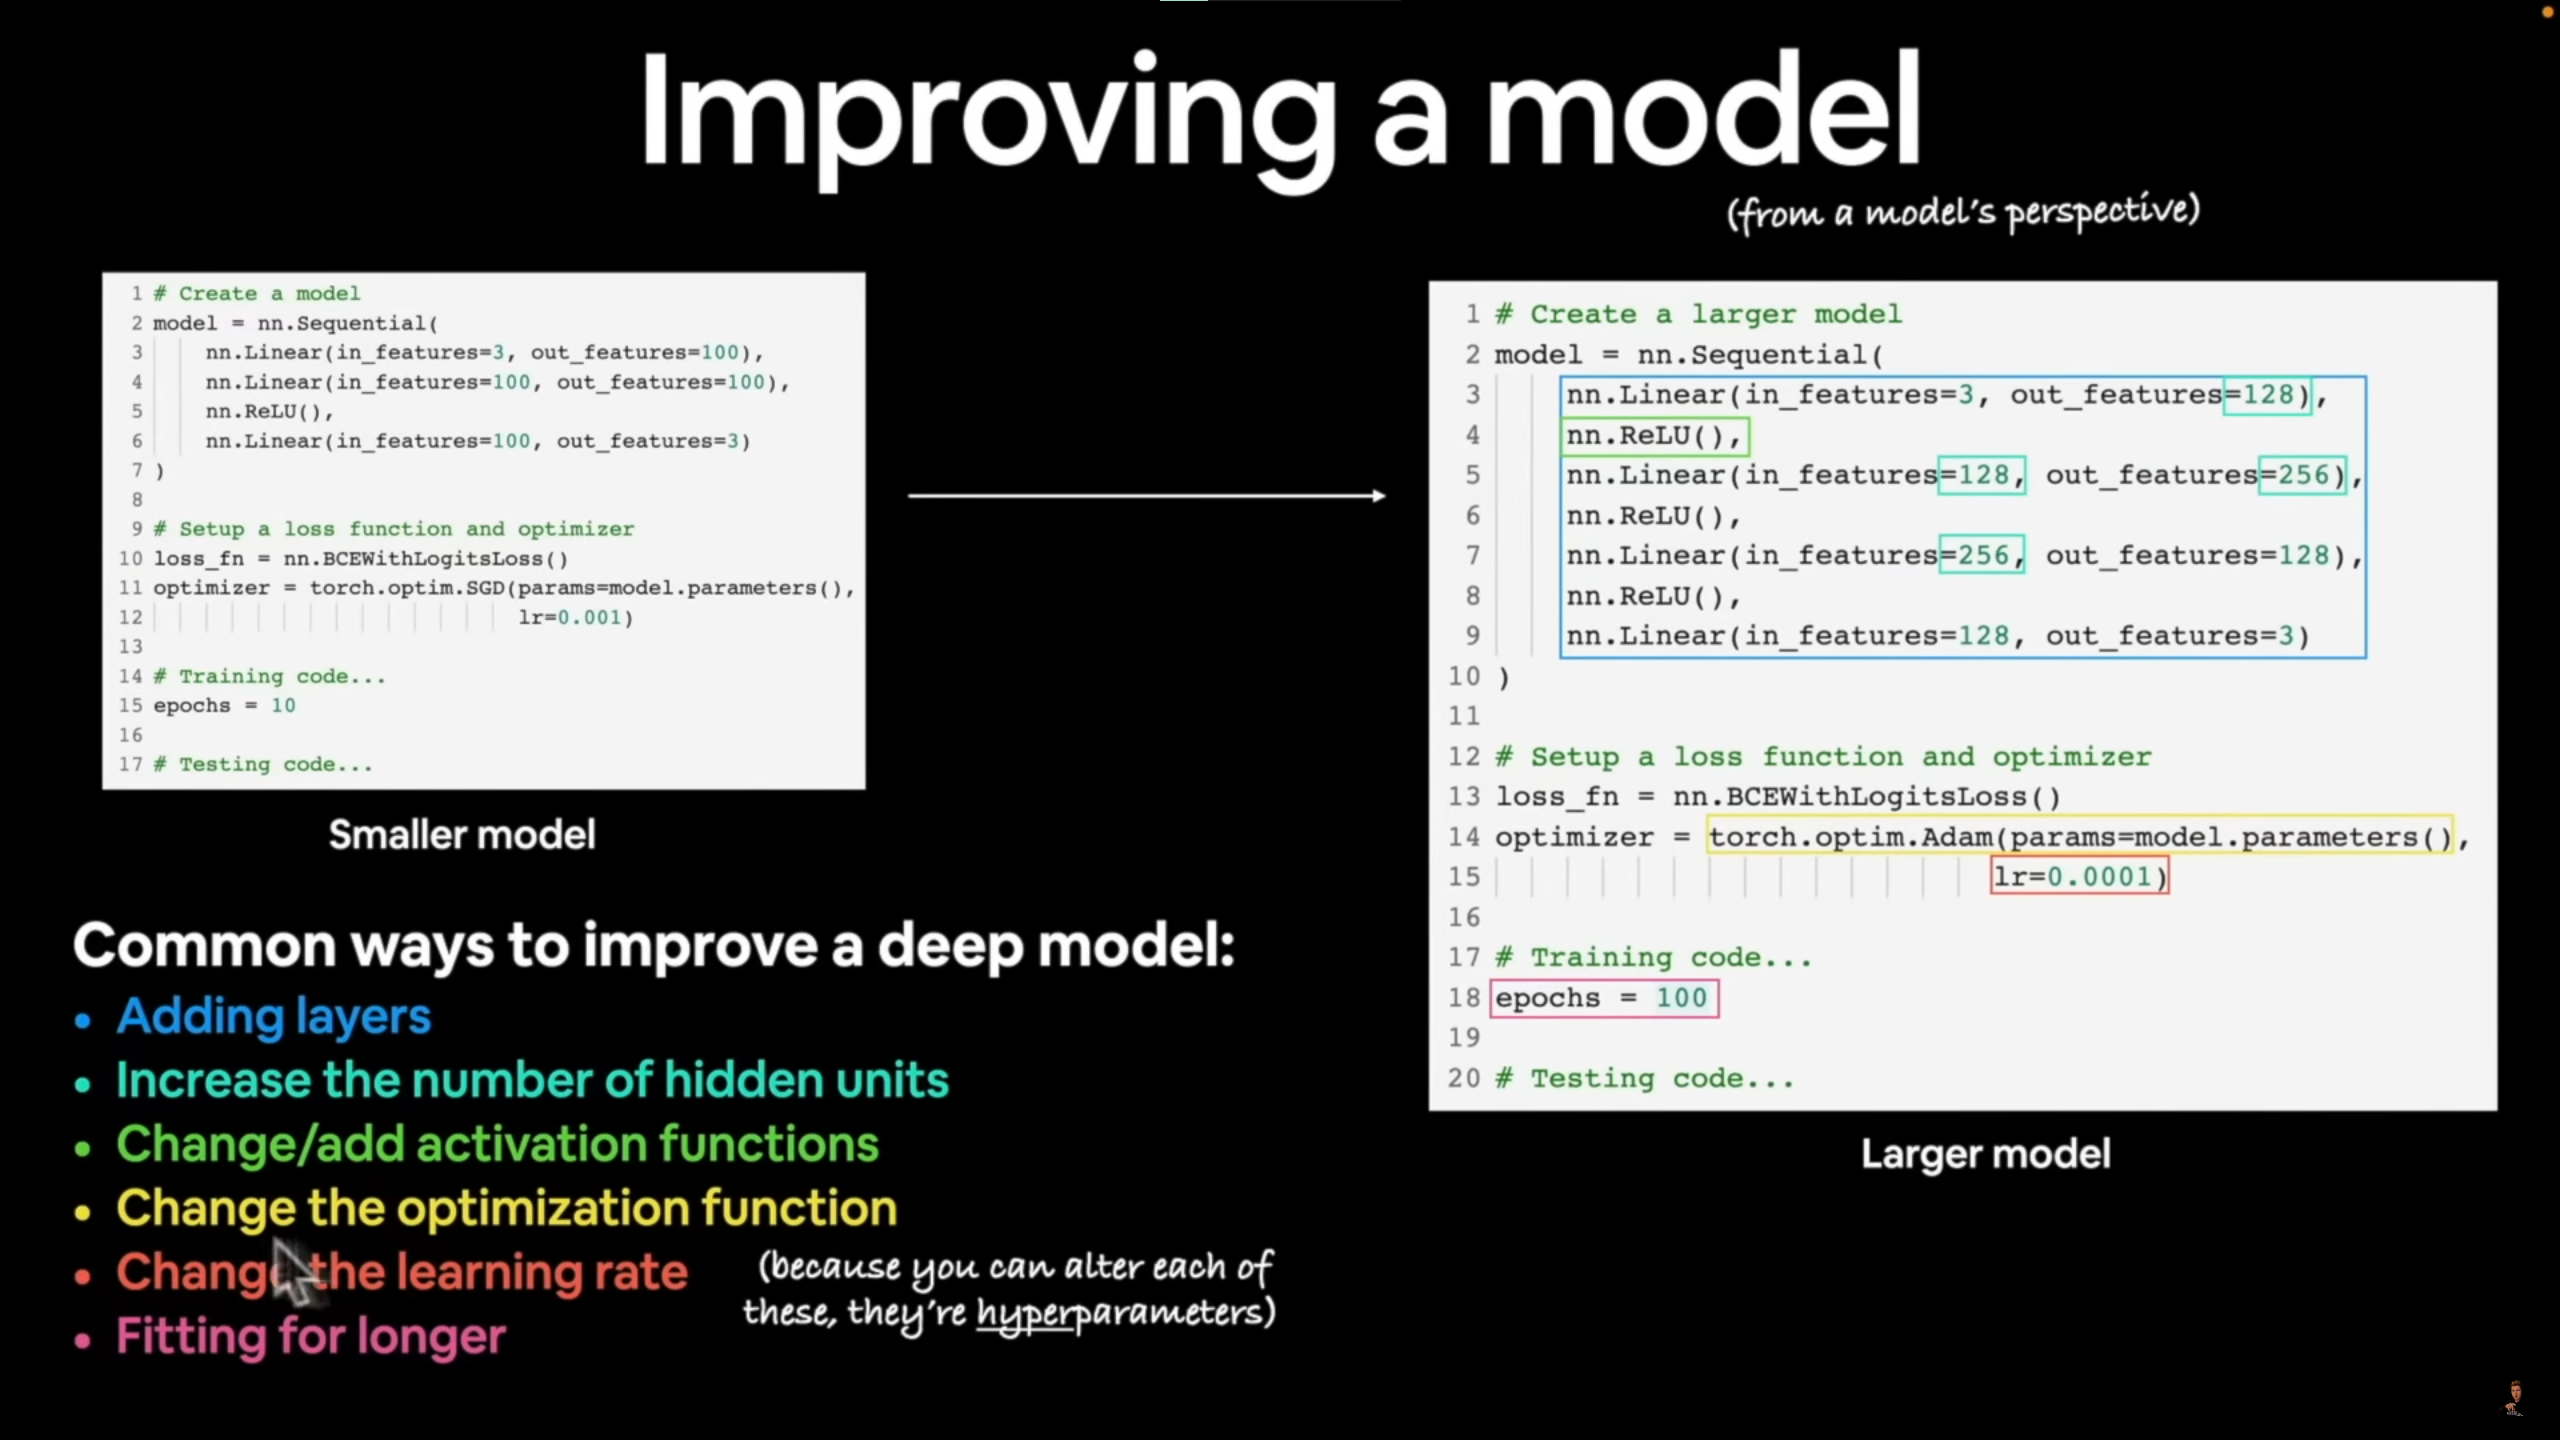


These options are all from a model's perspective because they deal directly with the model instead of the datapoints (improving from data)

Because these are all options are all values we can change, they are HYPERPARAMETERS

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

Normally do one at a time to find out if it affects the prediction accuracy

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
  
  def forward(self, x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    # writing it as z = self.layer_3(self.layer_2(self.layer_1(x)))
    return z

model_1 = CircleModelV1().to(device)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss() = sigmoid activation function built in

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# An epoch is one loop through the data epoch is a hyperparameter since we set it ourselves
epochs = 1000

# Put data to target device 
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Tracking different values of current model vs new model
epoch_count = []
loss_values = []
test_loss_values = []

### Training 
# 0. Loop through the data
for epoch in range (epochs):
  # Set the model to training mode
  model_0.train() # train mode in Pytorch sets all parameters that require 
  model_0.eval() # turns off gradient tracking

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

  # 2. Calculate loss 
  # for this loss, since our loss function is BCEWithLogitsLoss, the loss_fn takes in logits as the first parameter instead of y_pred
  # if the loss function was .BCELoss() instead of BCEWithLogitsLoss(), the loss calculation would be as follows
  # loss = loss_fn(torch.sigmoid(y_logits), y_train)
  loss = loss_fn(y_logits, y_train)
  acc = accuracy(y_true=y_train,
                 y_pred=y_pred)
  
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumuate through the loop... so we have to zero them in step 3 during the next iteration
 
  ### Testing
  model_1.eval() # turns off gradient tracking & different settings in the model not needed for evaluation
  
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
    # 1. Do forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy(y_true=y_test,
                           y_pred=test_pred)
  # Status Update
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Loss: {loss:.5f} , Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396 , Acc: 50.88% | Test Loss: 0.69261, Test acc: 51.00%
Epoch: 10 | Loss: 0.69369 , Acc: 50.25% | Test Loss: 0.69270, Test acc: 50.00%
Epoch: 20 | Loss: 0.69351 , Acc: 50.12% | Test Loss: 0.69283, Test acc: 49.50%
Epoch: 30 | Loss: 0.69339 , Acc: 50.50% | Test Loss: 0.69297, Test acc: 48.00%
Epoch: 40 | Loss: 0.69329 , Acc: 50.38% | Test Loss: 0.69310, Test acc: 49.00%
Epoch: 50 | Loss: 0.69322 , Acc: 49.88% | Test Loss: 0.69324, Test acc: 50.00%
Epoch: 60 | Loss: 0.69317 , Acc: 49.38% | Test Loss: 0.69336, Test acc: 51.50%
Epoch: 70 | Loss: 0.69312 , Acc: 49.38% | Test Loss: 0.69348, Test acc: 50.50%
Epoch: 80 | Loss: 0.69309 , Acc: 50.12% | Test Loss: 0.69359, Test acc: 50.00%
Epoch: 90 | Loss: 0.69307 , Acc: 50.50% | Test Loss: 0.69370, Test acc: 48.50%
Epoch: 100 | Loss: 0.69305 , Acc: 50.38% | Test Loss: 0.69379, Test acc: 48.00%
Epoch: 110 | Loss: 0.69303 , Acc: 50.88% | Test Loss: 0.69388, Test acc: 46.50%
Epoch: 120 | Loss: 0.69302 , Acc: 50.75% | Test Los

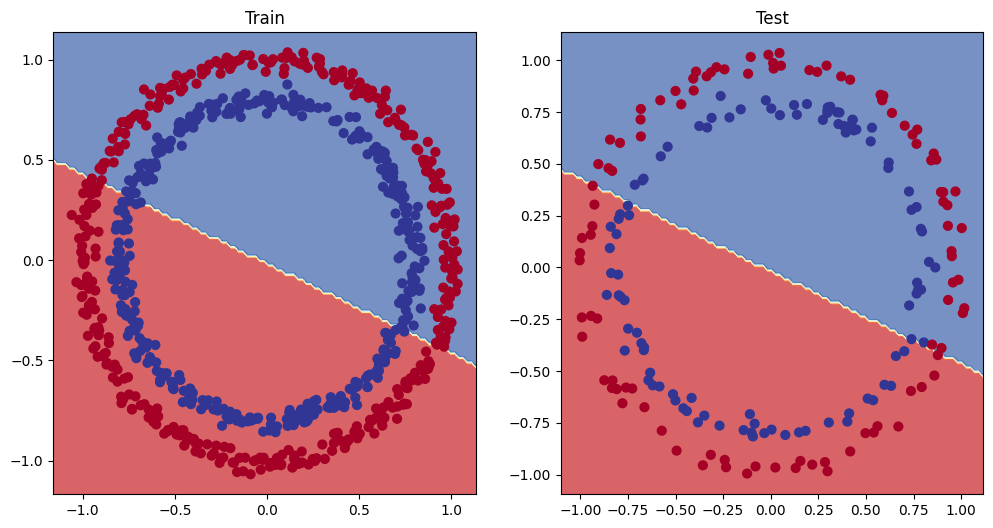

In [ ]:
from helper_function import plot_predictions, plot_decision_boundary

# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

# the line represents the line that the model is trying to fit on the model

   ## 6. The missing piece: Non-linearity

   "What patterns could you draw if you were given an infinite amount of a straight and non-straight line?"

   Or in machine learning terms, an infinite (but really finite) number of linear and non-linear functions

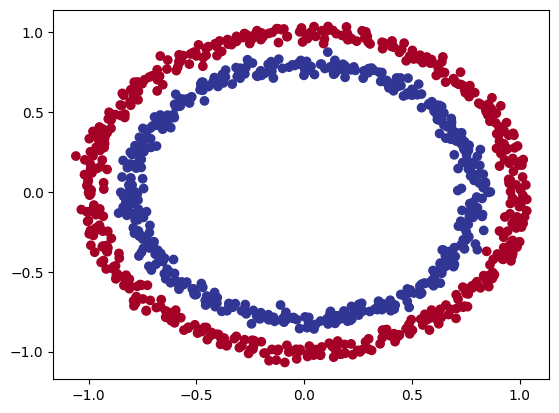

In [ ]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [ ]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

# Split data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42 # seeded random splits
                                                    )

In [ ]:
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    # Where should we put our non-linear activation function?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup Loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), 
                            lr=0.1)

In [ ]:
## ing a model with non-linearity 

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all the data on the target device 
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):
  ###Training
  model_3.train()

  # 1. Forward pass 
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy(y_true=y_train,
                    y_pred=y_pred)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy(y_true=y_test,
                        y_pred=test_pred)
    
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss 0.6929, Acc: 50.00% | Test Loss: 0.6932, Test Acc: 46.00%
Epoch: 100 | Loss 0.6912, Acc: 52.88% | Test Loss: 0.6910, Test Acc: 46.00%
Epoch: 200 | Loss 0.6898, Acc: 53.37% | Test Loss: 0.6894, Test Acc: 46.00%
Epoch: 300 | Loss 0.6879, Acc: 53.00% | Test Loss: 0.6872, Test Acc: 46.00%
Epoch: 400 | Loss 0.6852, Acc: 52.75% | Test Loss: 0.6841, Test Acc: 46.00%
Epoch: 500 | Loss 0.6810, Acc: 52.75% | Test Loss: 0.6794, Test Acc: 46.00%
Epoch: 600 | Loss 0.6751, Acc: 54.50% | Test Loss: 0.6729, Test Acc: 46.00%
Epoch: 700 | Loss 0.6666, Acc: 58.38% | Test Loss: 0.6632, Test Acc: 46.00%
Epoch: 800 | Loss 0.6516, Acc: 64.00% | Test Loss: 0.6476, Test Acc: 46.00%
Epoch: 900 | Loss 0.6236, Acc: 74.00% | Test Loss: 0.6215, Test Acc: 46.00%


In [ ]:
### 6.4 Evaluating a model trained with non-linear activation functions

model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

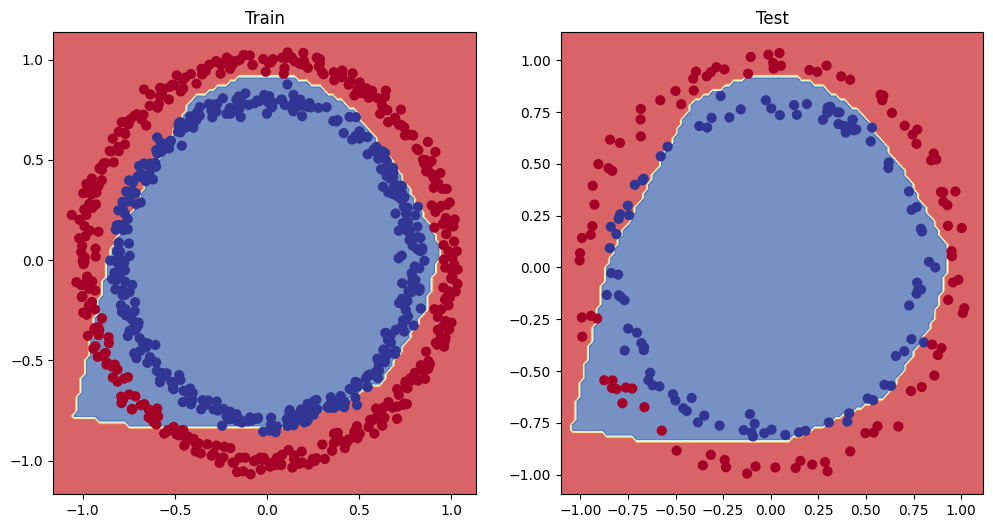

In [ ]:
# Plot decision boundaries

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non-linear activation functions

Neural networks, rather than telling us the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the best patterns on its own.

And these tools are linear and non-linear functions.

In [ ]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype, A

(torch.float32,
 tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]))

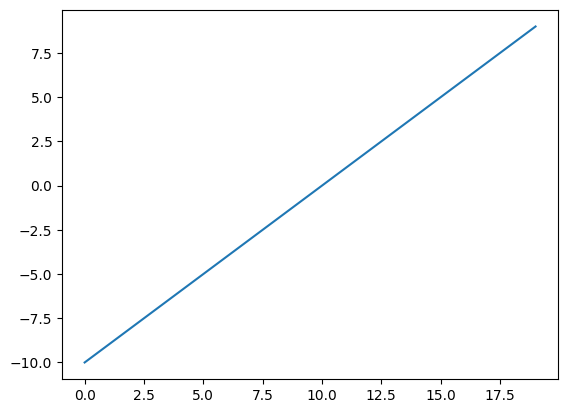

In [ ]:
# Visualize this data
plt.plot(A)

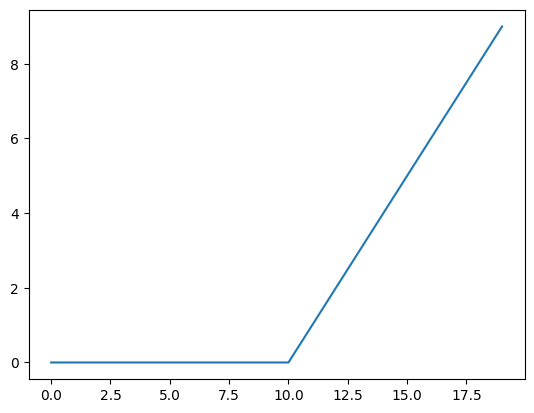

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.max(torch.tensor(0),x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

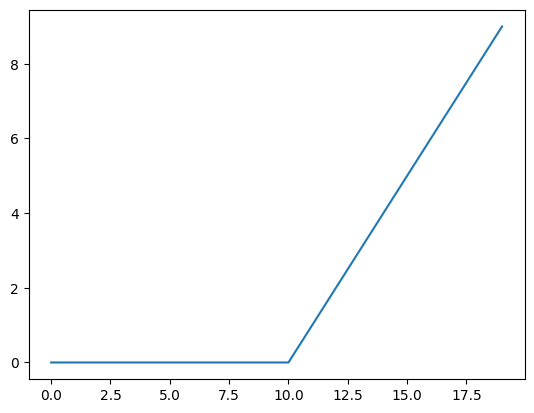

In [ ]:
# Plot ReLU activation function
plt.plot(relu(A))

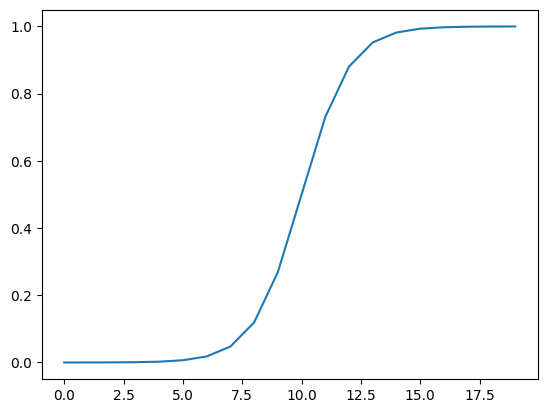

In [ ]:
plt.plot(torch.sigmoid(A))

In [ ]:
def sigmoid(x: torch.Tensor) -> torch.Tensor:
  return 1 / (1 + torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

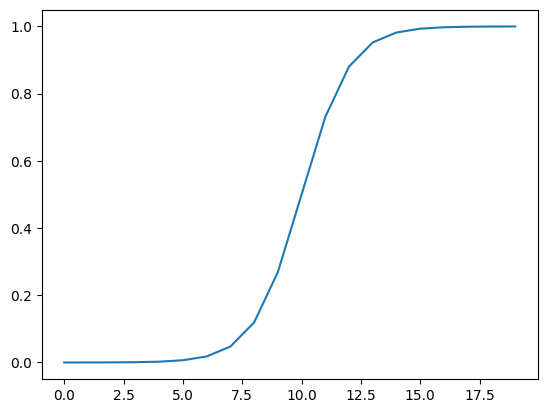

In [ ]:
plt.plot(sigmoid(A))

## Putting everything together with a multi-class classification problem

* Binary Classification = one thing or another (cat vs corgi)
* Multiclass Classification = more than one thing or another (cat vs corgi vs chicken)


### 8.1 Creating a toy multi-class dataset

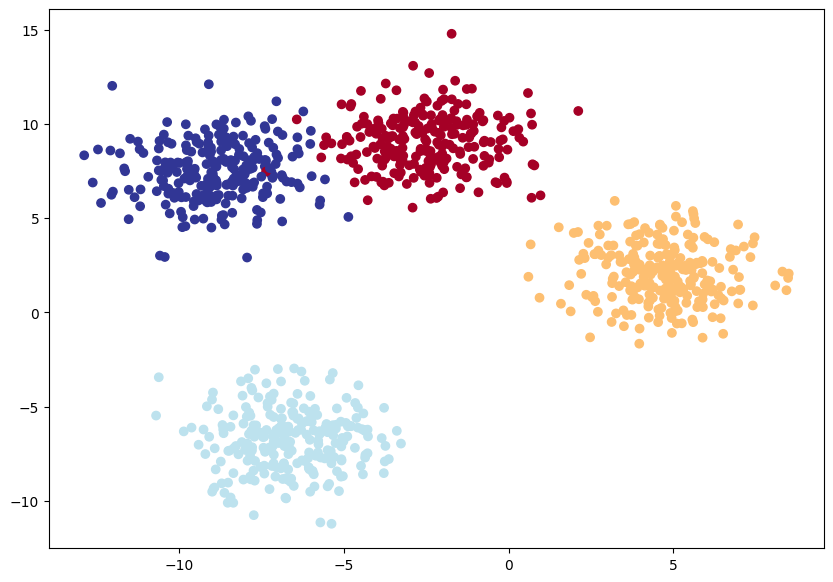

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000, 
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std = 1.5,
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors (need to conver them into tensors since sklearn makes use of numpy)
X_blob = torch.from_numpy(X_blob).type(torch.float) # why need LongTensor 
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                              y_blob,
                                                              test_size=0.2,
                                                              random_state=RANDOM_SEED)

# 4. Plot data (VISUALIZE)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)



### 8.2 Building a multi-class classification model in PyTorch

In [ ]:
 # Create device agnostic coe
 device = "cuda" if torch.cuda.is_available() else "epu"
 device

'cuda'

In [ ]:
# Build a multi-class classification model

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multi-class classification model.

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of output features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 9

    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )
  def forward(self,x):
    return self.linear_layer_stack(x)

# Create an instance of Blobmodel and send it to the target device

model_4 = BlobModel(input_features=2,output_features=4, hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Create a loss function and an optimizer for a multi-classification model

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)



### 8.4 Getting prediction probabilities for a multi-class PyTorch model

In order to evaluate and train and test out model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels.

To do so, use an output activation function. For a multi-class activation,
we shall use a softmax output activation function (Unlike for binary classification where sigmoid function is used instead)

For each prediction probabilities, the individual probabilities of the tensors correspond to the probability of it being that output feature. One value for each classes (0th index)

Logits (raw output of the model) -> Prediction probabilities (use torch.softmax) -> Prediction labels (taking the argmax of the prediction probabilities)

In [ ]:
# Let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
  y_pred_probs = torch.softmax(y_logits, dim=1)
y_logits[:10], y_pred_probs[:10]

(tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
         [-0.0973, -0.9431, -0.5963, -0.1371],
         [ 0.2528, -0.2379,  0.1882, -0.0066],
         [-0.4134, -0.5204, -0.9303, -0.6963],
         [-0.3118, -1.3736, -1.1991, -0.3834],
         [-0.1497, -1.0617, -0.7107, -0.1645],
         [ 0.1539, -0.2887,  0.1520, -0.0109],
         [-0.2154, -1.1795, -0.9300, -0.2745],
         [ 0.2443, -0.2472,  0.1649,  0.0061],
         [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0'),
 tensor([[0.3169, 0.3244, 0.1405, 0.2182],
         [0.3336, 0.1432, 0.2026, 0.3206],
         [0.3011, 0.1843, 0.2823, 0.2323],
         [0.3078, 0.2766, 0.1836, 0.2320],
         [0.3719, 0.1286, 0.1532, 0.3463],
         [0.3381, 0.1358, 0.1929, 0.3331],
         [0.2867, 0.1841, 0.2861, 0.2431],
         [0.3554, 0.1355, 0.1740, 0.3351],
         [0.3009, 0.1841, 0.2779, 0.2371],
         [0.3595, 0.1350, 0.1695, 0.3360]], device='cuda:0'))

In [ ]:
y_pred_probs[0]

tensor([0.3169, 0.3244, 0.1405, 0.2182], device='cuda:0')

In [ ]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [ ]:
torch.argmax(y_pred_probs[0])

tensor(1, device='cuda:0')

In [ ]:
# To convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [ ]:
y_blob_train

tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0, 0, 0, 3, 2, 3, 2, 1, 1, 3, 2, 2, 2, 3, 1,
        3, 2, 3, 0, 1, 0, 0, 1, 1, 3, 0, 2, 2, 1, 1, 3, 1, 1, 2, 3, 3, 0, 0, 0,
        1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 3, 1, 0, 2, 1, 3, 2, 2, 2, 1, 0, 2,
        3, 1, 1, 1, 2, 0, 0, 1, 2, 3, 1, 3, 3, 2, 3, 3, 2, 2, 1, 0, 0, 1, 2, 1,
        3, 1, 2, 1, 3, 3, 3, 0, 2, 1, 2, 3, 1, 1, 2, 0, 3, 3, 2, 0, 2, 0, 3, 2,
        0, 0, 2, 2, 0, 1, 2, 0, 3, 3, 2, 3, 2, 1, 3, 1, 1, 1, 1, 0, 0, 1, 0, 2,
        3, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 2, 2, 0, 0, 3, 0, 3, 3, 3, 0, 2, 0, 1,
        2, 2, 2, 3, 0, 1, 1, 0, 1, 2, 0, 3, 2, 1, 3, 2, 3, 0, 3, 1, 1, 2, 2, 2,
        2, 2, 2, 0, 3, 3, 2, 1, 1, 2, 3, 1, 0, 0, 1, 3, 0, 1, 3, 3, 2, 3, 3, 3,
        1, 0, 0, 1, 0, 3, 2, 1, 0, 3, 0, 0, 3, 1, 0, 1, 0, 2, 2, 0, 0, 3, 3, 2,
        0, 2, 0, 3, 1, 3, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1, 3, 1, 1, 0, 2,
        2, 3, 1, 0, 1, 2, 3, 1, 2, 0, 3, 1, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 1, 0,
        2, 2, 2, 2, 3, 1, 2, 2, 0, 2, 3,

In [ ]:
y_logits

tensor([[-7.6459e-01, -7.4120e-01, -1.5777e+00, -1.1376e+00],
        [-9.7256e-02, -9.4310e-01, -5.9631e-01, -1.3715e-01],
        [ 2.5277e-01, -2.3794e-01,  1.8817e-01, -6.5686e-03],
        [-4.1340e-01, -5.2042e-01, -9.3033e-01, -6.9626e-01],
        [-3.1184e-01, -1.3736e+00, -1.1991e+00, -3.8337e-01],
        [-1.4971e-01, -1.0617e+00, -7.1069e-01, -1.6452e-01],
        [ 1.5388e-01, -2.8874e-01,  1.5199e-01, -1.0874e-02],
        [-2.1543e-01, -1.1795e+00, -9.3000e-01, -2.7448e-01],
        [ 2.4432e-01, -2.4716e-01,  1.6492e-01,  6.1044e-03],
        [-2.3286e-01, -1.2120e+00, -9.8487e-01, -3.0037e-01],
        [-1.7742e-01, -1.1008e+00, -8.2929e-01, -2.3689e-01],
        [-9.4082e-01, -7.8985e-01, -1.8480e+00, -1.3347e+00],
        [-2.9723e-01, -1.3458e+00, -1.1543e+00, -3.6287e-01],
        [-2.9006e-01, -1.3393e+00, -1.1146e+00, -3.3518e-01],
        [-3.3713e-01, -1.4374e+00, -1.2379e+00, -3.8029e-01],
        [-1.0260e-01, -9.5066e-01, -6.1913e-01, -1.5105e-01],
        

### 8.5 Creating a training loop and testing loop for a multi-class PyTorch model

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  ### Training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy(y_true=y_blob_train,
                 y_pred=y_pred)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy(y_true = y_blob_test, y_pred = test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.0636, Acc: 54.62% | Test Loss 1.0039, Test Acc: 55.00%
Epoch: 10 | Loss: 0.6210, Acc: 97.25% | Test Loss 0.6367, Test Acc: 98.00%
Epoch: 20 | Loss: 0.4061, Acc: 98.75% | Test Loss 0.4104, Test Acc: 100.00%
Epoch: 30 | Loss: 0.2362, Acc: 99.12% | Test Loss 0.2268, Test Acc: 99.50%
Epoch: 40 | Loss: 0.1044, Acc: 99.25% | Test Loss 0.0949, Test Acc: 99.50%
Epoch: 50 | Loss: 0.0640, Acc: 99.25% | Test Loss 0.0563, Test Acc: 99.50%
Epoch: 60 | Loss: 0.0497, Acc: 99.25% | Test Loss 0.0419, Test Acc: 99.50%
Epoch: 70 | Loss: 0.0424, Acc: 99.25% | Test Loss 0.0343, Test Acc: 99.50%
Epoch: 80 | Loss: 0.0380, Acc: 99.25% | Test Loss 0.0295, Test Acc: 99.50%
Epoch: 90 | Loss: 0.0350, Acc: 99.25% | Test Loss 0.0264, Test Acc: 99.50%


### 8.6 Making and evaluating predictions with a PyTorch multiclass model

In [ ]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# viewing the first 10 logits
y_logits[:10]

tensor([[-0.6257,  6.0063, -7.6488, -8.4666],
        [-2.1813, -6.3889, -3.7303,  3.1376],
        [-3.4241, -3.9088,  3.1701, -2.6211],
        [-1.1539,  4.2110, -3.8565, -4.8926],
        [ 3.7713, -1.3379, -9.1623, -6.9665],
        [-2.8284, -7.5936, -4.3072,  3.8118],
        [-3.0427, -3.3442,  2.8070, -2.1454],
        [ 3.3902, -4.0445, -6.9149, -3.5610],
        [-4.3793, -5.0066,  3.8291, -3.3930],
        [ 3.5159, -3.0320, -7.5575, -4.7203]], device='cuda:0')

In [ ]:
# Go from logits -> Prediction probabilities -> Prediction labels
y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
y_pred[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

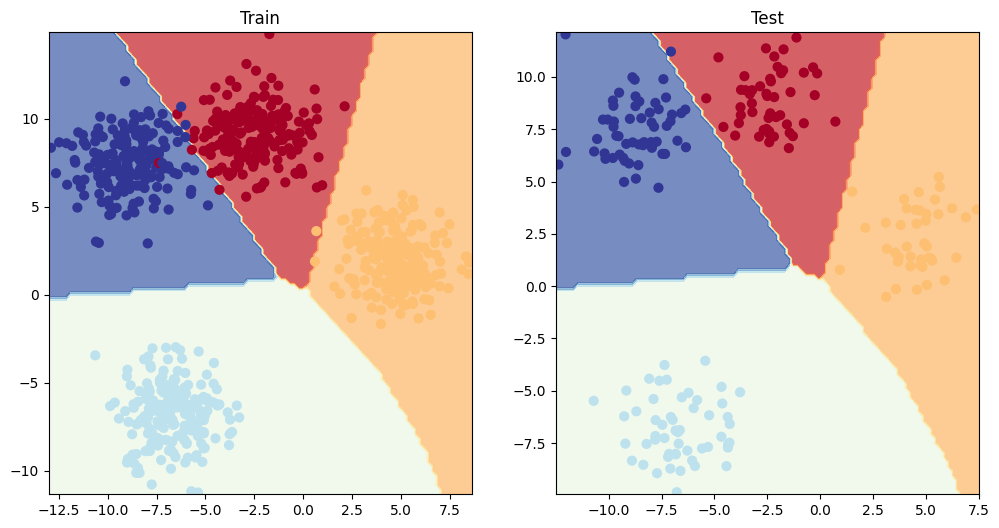

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics... (to evaluate our classification model)

* Accuracy - out of 100 samples, how many does out model get right?
* Precision 
* Recall 
* F1-Score
* Confusion matrix
* Classification report



In [ ]:
!pip install torchmetrics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 36.9 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

#Calculate accuracy
torchmetric_accuracy(y_pred, y_blob_test)

tensor(0.9950, device='cuda:0')